<a href="https://colab.research.google.com/github/Auxilus08/DHV/blob/main/Practical_3B.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
latency =  [30, 32, 31, 29, 150, 28, 27, 33, 34, 29, 31, 35, 200, 29, 30, 28, 33]

In [8]:
import numpy as np
from scipy import stats

In [12]:
mean_val = np.mean(latency)
mode_val = stats.mode(latency)[0]
median_val = np.median(latency)

print("Mean: ", mean_val)
print("Mode: ", mode_val)
print("Median: ", median_val)

Mean:  47.588235294117645
Mode:  29
Median:  31.0


In [10]:
skewness = stats.skew(latency)
print("Skewness: ", skewness)

kurtosis = stats.kurtosis(latency)
print("Kurtosis: ", kurtosis)

Skewness:  2.5128078704103576
Kurtosis:  4.613368274768248


In [13]:
# modified Z score for outliers

median = np.median(latency)
mad = np.median([np.abs(latency - median)])
modified_z_scores = [0.6745 * (x - median) / mad for x in latency]
outliers_mz = [x for x, mz in zip(latency, modified_z_scores) if abs(mz) > 3.5]

In [17]:
# Tukey's fences

Q1, Q3 = np.percentile(latency, [25, 75])
IQR = Q3 - Q1
lower_fence = Q1 - 1.5 * IQR
upper_fence = Q3 + 1.5 * IQR
outliers_tukey = [x for x in latency if x < lower_fence or x > upper_fence]


print(f"Mean: {mean_val}, Median: {median_val}, Mode: {mode_val}")
print(f"Skewness: {skewness:.3f}, Kurtosis: {kurtosis:.3f}")
print(f"Outliers (Modified Z-Score): {outliers_mz}")
print(f"Outliers (Tukey's Fences): {outliers_tukey}")

Mean: 47.588235294117645, Median: 31.0, Mode: 29
Skewness: 2.513, Kurtosis: 4.613
Outliers (Modified Z-Score): [150, 200]
Outliers (Tukey's Fences): [150, 200]


Measures of Variation and ECDF(Emprical Cumulative Distribution Function) on Grouped Data with Unequal Class Widths

In [ ]:
import matplotlib.pyplot as plt

In [21]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

class_intervals = [(10, 19), (20,34), (35, 49), (50, 70)]
frequencies = [4, 7, 6, 3]

midpoints = [(low + high) / 2 for low, high in class_intervals]
n = sum(frequencies)

mean_grouped = sum(f * x for f, x in zip(frequencies, midpoints)) / n
variance = sum(f * (x - mean_grouped)**2 for f, x in zip(frequencies, midpoints)) / n
cv = (np.sqrt(variance) / mean_grouped) * 100


cum_freq = np.cumsum(frequencies)


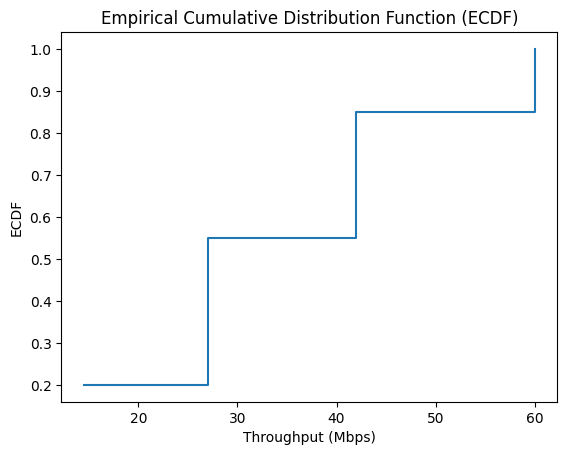

In [24]:
ecdf_x = []
ecdf_y = []

for i, f in enumerate(frequencies):
  ecdf_x.append(midpoints[i])
  ecdf_y.append(cum_freq[i]/n)

plt.step(ecdf_x, ecdf_y, where = 'post')
plt.xlabel("Throughput (Mbps)")
plt.ylabel("ECDF")
plt.title("Empirical Cumulative Distribution Function (ECDF)")
plt.show()

In [27]:
print(f"Mean : {mean_grouped}, variance : {variance:.3f}, CoV : {cv:.3f}%")

Mean : 33.95, variance : 213.797, CoV : 43.069%


Multivariate Z-score and Anomaly Detection

In [38]:
cpu = np.array([30, 40, 35, 50, 100, 45, 60, 55, 65, 95])
memory = np.array([40, 45, 50, 55, 90, 48, 60, 59, 70, 100])

data = np.vstack([cpu,memory]).T

In [39]:
print(data[:5])

[[ 30  40]
 [ 40  45]
 [ 35  50]
 [ 50  55]
 [100  90]]


In [40]:
mean_vector = np.mean(data, axis=0)
std_vector = np.std(data, axis=0)
cov_matrix = np.cov(data.T)

print("Mean Vector:", mean_vector)
print("Standard Deviation Vector:", std_vector)
print("Covariance Matrix:\n", cov_matrix)

Mean Vector: [57.5 61.7]
Standard Deviation Vector: [22.5        18.61746492]
Covariance Matrix:
 [[562.5        453.05555556]
 [453.05555556 385.12222222]]


In [41]:
z_scores = (data - mean_vector) / std_vector

In [42]:
anomalies = data[np.any(np.abs(z_scores) > 2, axis=1)]
print("Anomalies (CPU%, Memory%)")
print(anomalies)

Anomalies (CPU%, Memory%)
[[ 95 100]]


In [43]:
import matplotlib.patches as patches
import matplotlib.transforms as transforms

In [48]:
def confidence_ellipse(x, y, ax, n_std = 2.0, **kwargs):
  cov = np.cov(x, y)
  pearson = cov[0, 1]/np.sort(cov[0, 0]*cov[1, 1])
  ell_radius_x = np.sqrt(1 + pearson)
  ell_radius_y = np.sqrt(1 - pearson)
  ellipse = patches.Ellipse((0, 0), width=ell_radius_x * 2, height=ell_radius_y * 2, fill=False, **kwargs)

  scale_x = np.sqrt(cov[0, 0]) * n_std
  mean_x = np.mean(x)

  scale_y = np.sqrt(cov[1, 1]) * n_std
  mean_y = np.mean(y)

  transf = transforms.Affine2D().rotate_deg(45).scale(scale_x, scale_y).translate(mean_x, mean_y)

  ellipse.set_transform(transf + ax.transData)
  return ax.add_patch(ellipse)
